In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#for visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
fish=pd.read_csv('Fish.csv')
fish.shape

(159, 7)

In [3]:
fish.head()
#to get first 5 row ,if you want last 5 row use (tail())
#if you want to get any number of row write that number in head() Like: head(13) 

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
fish.describe()
#get more information about column 

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
fish['Species'].value_counts()
#count the species of fish we have in data 

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

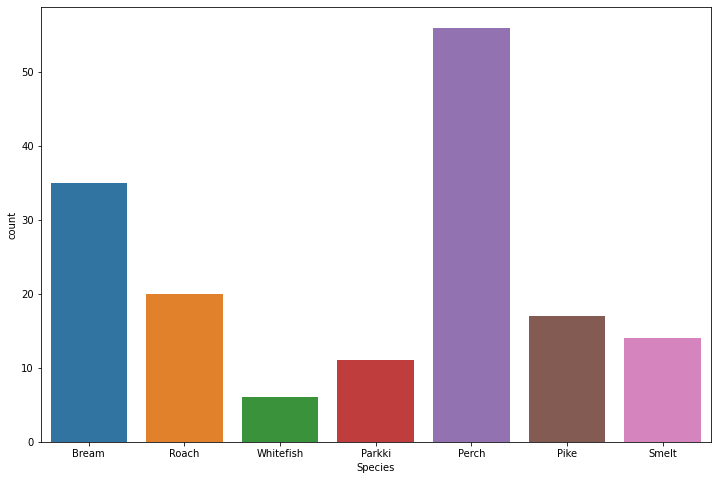

In [7]:
#visualization 
plt.figure(figsize=(12,8))
sns.countplot(fish['Species'])
plt.show()

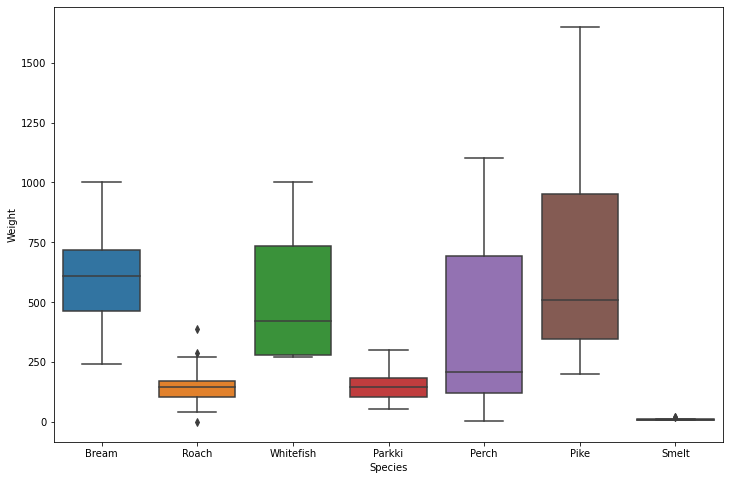

In [8]:
# We can look at an individual feature in Seaborn through a 

plt.figure(figsize=(12,8))
sns.boxplot(x="Species", y="Weight", data=fish)
plt.show()

In [9]:
#we will split our data to dependent and independent
#first dependent data 
X=fish.iloc[:,1:]
X.head(2)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.52,4.0200
1,290.0,24.0,26.3,31.2,12.48,4.3056


In [10]:
#second independent
# we add more [] to make it 2d array
y=fish[["Species"]]
y.head(2)

,Species
0,Bream
1,Bream


# Train model to get best one


In [11]:
#split our data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
#there are to many model to train it but we will use two model 
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state =42)
logistic_classifier.fit(X_train,y_train)

C:\Users\csoft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\csoft\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

In [13]:
logistic_classifier.score(X_test,y_test)

0.875

# Train anthor model to get best prediction

In [14]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)

C:\Users\csoft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear', random_state=42)

In [15]:
classifier.score(X_test,y_test)

0.9375

best prediction we have (93.75%) to SVM